In [1]:
import numpy as np
import json
from pprint import pprint

from collections import defaultdict
import operator

import matplotlib.pyplot as plt; plt.rcdefaults()


import seaborn as sns

import sys
sys.path.append('../src')
import os
from tqdm import tqdm

In [2]:
data = json.load(open('../data/train.json'))

In [3]:
def rad2degree(lat, lng):
  lng = np.degrees(lng + 0.1)
  lat = np.degrees(lat - 0.015)
  if lat > 180:
    lat = lat - 360
  return lat, lng   

In [4]:
full_w, full_h = 4552, 2276 

hop_all = []
hop_sen = []

hop_list = {
  '0->1':[],
  '1->2':[],
  '2->3':[],
  '3->4':[]
}
hop_count = {
  '0':[],
  '1':[],
  '2':[],
  '3':[],
  '4':[]
}
for h in data:
  hop = 0
  if len(h['actions']) < 1:
    continue  
  for ii, inst in enumerate(h['actions'][0]['act_deg_list']):
    n = len(inst)
    hop_sen += [n]
    hop += n
    hop_count['{}'.format(ii)] += [n]
    
    first_x, first_y = -1,-1
    for jj, fov in enumerate(inst):
      lng, lat = fov[0], fov[1]
      
      fx = int(full_w * ((lat + 180)/360.0))
      fy = int(full_h - full_h * ((lng + 90)/180.0))
      
      if first_x < 0:
        first_x, first_y = fx, fy
    if ii >= 1:
      d = ((first_x - prev_x)**2 + (first_y - prev_y)**2)**0.5
      hop_list['{}->{}'.format(ii-1,ii)] += [d]
    prev_x, prev_y = first_x, first_y
  hop_all += [hop]

In [5]:
hlk = list(hop_count.keys()) 
lists = [hop_sen,hop_all] + [ hop_count[h] for h in hlk]
labels = ['Per Instruction','Per Instruction Sequence'] + hlk

5.178710030713554 1 141 3.0
16.993046875 5 149 15.0
9.279375 1 141 8.0
3.39371678649578 1 86 2.0
3.3965719652500588 1 72 2.0
3.2797052502302733 1 41 2.0
3.31266846361186 1 45 2.0


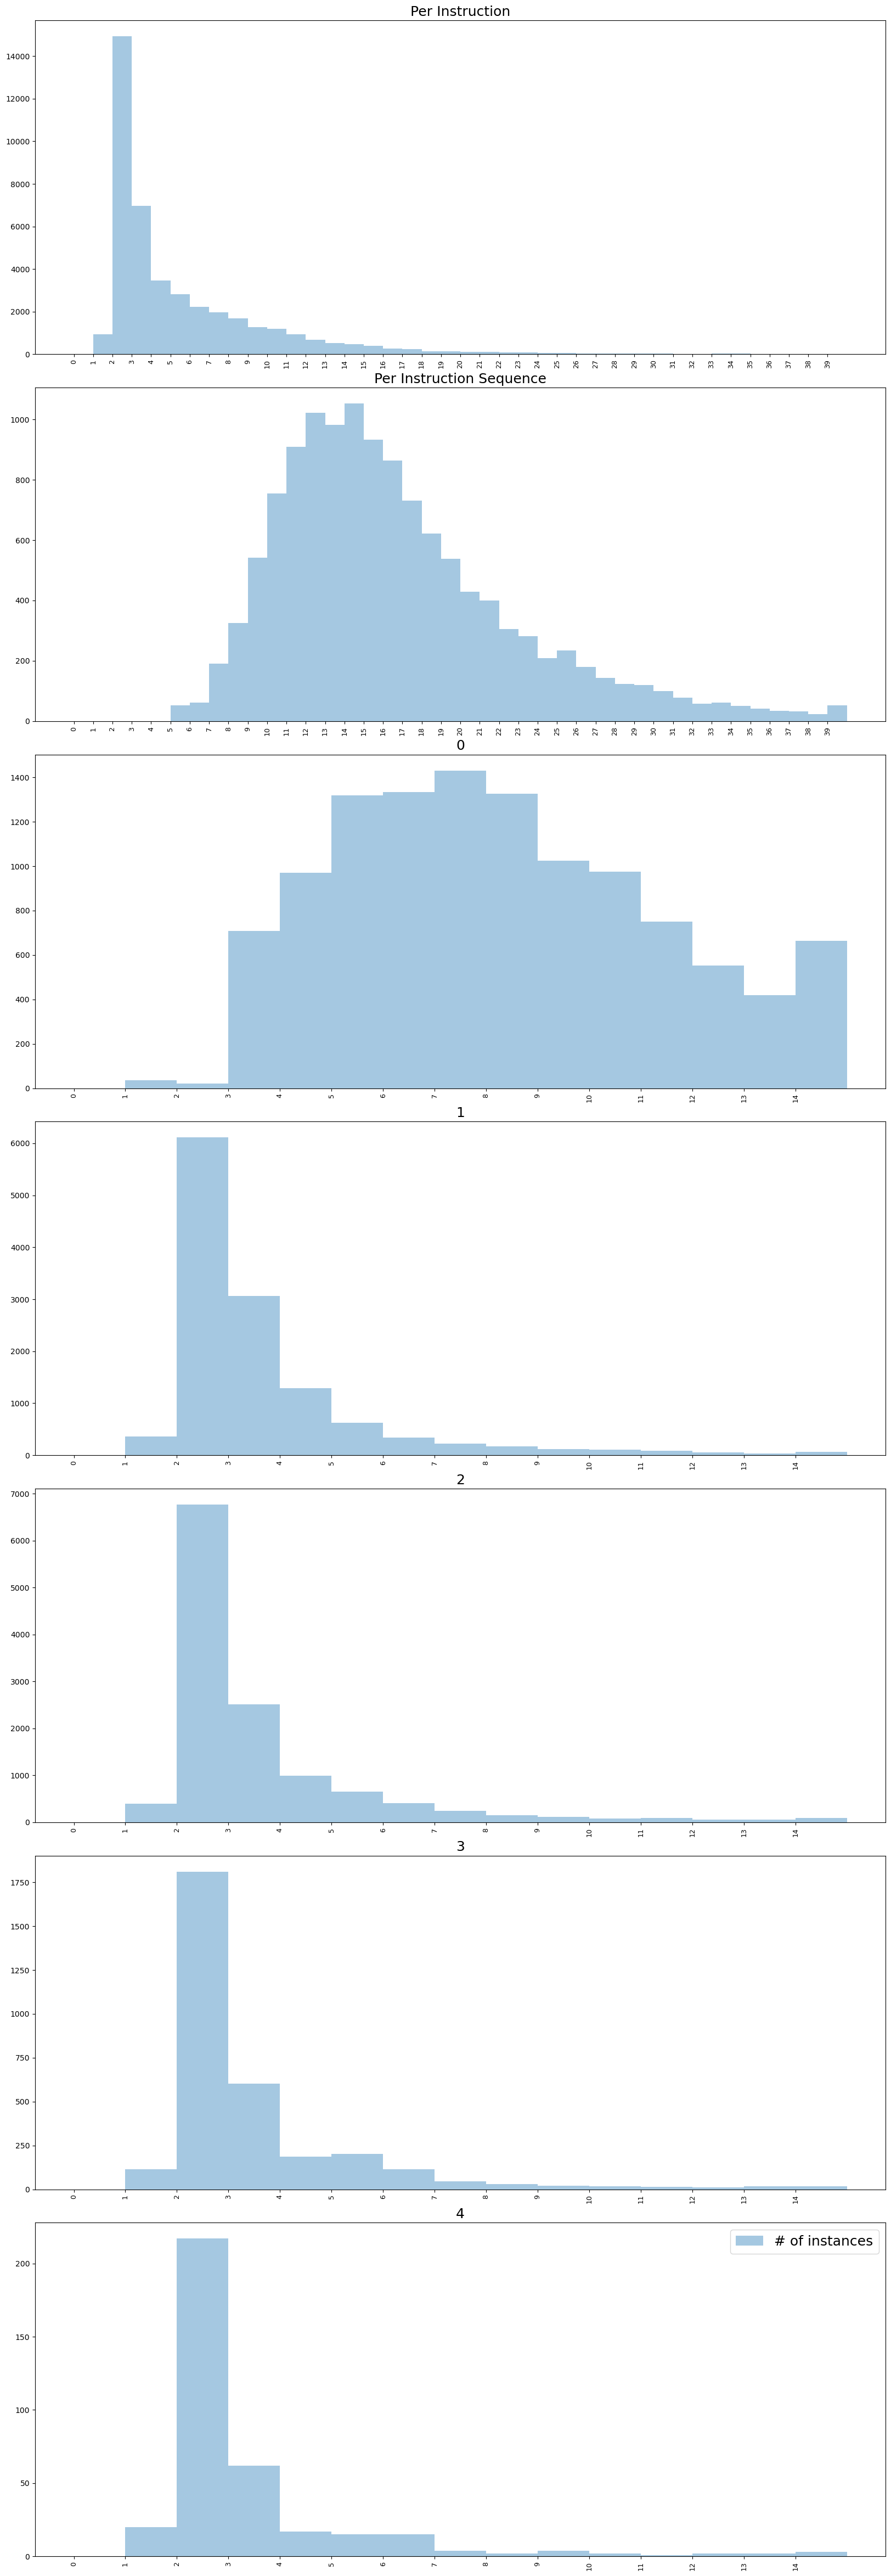

In [6]:
nrow = len(lists)
ncols = 1
fig, axs = plt.subplots(nrows=nrow, ncols=ncols, figsize=(20,60))
fig.subplots_adjust(hspace = 0.1 ) 

jj =0
FONTSIZE=18

MAXES = [40,40] + [15]*len(hlk)
BINS = [40,40] + [15]*len(hlk)
for ii, l in enumerate(lists):
  axs[ii].hist(np.array(l), density = False, bins = BINS[ii], range = (0,MAXES[ii]),  alpha=0.4, label='# of instances')
  axs[ii].set_title('{}'.format(labels[ii]), fontsize=FONTSIZE)
  axs[ii].set_xticks(np.arange(MAXES[ii]))
  axs[ii].set_xticklabels(np.arange(MAXES[ii]), rotation='vertical', fontsize=FONTSIZE/2)
  print(np.mean(l),np.min(l),np.max(l),np.median(l))
      
plt.legend( prop={'size': FONTSIZE})
plt.rc('xtick',labelsize=FONTSIZE)
plt.rc('ytick',labelsize=FONTSIZE)
plt.show() 

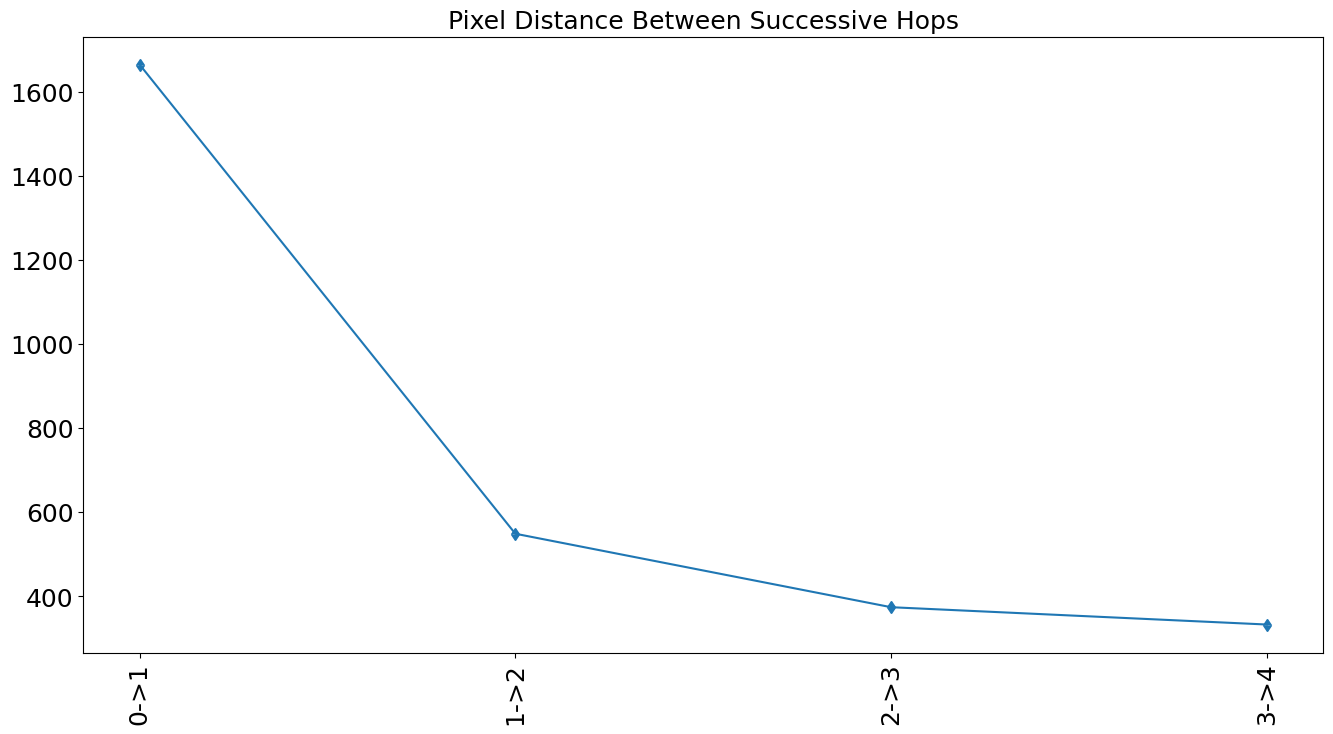

In [7]:
fig = plt.figure(figsize=(16,8))

labels = ['3->4', '2->3','1->2','0->1'][::-1]
x = np.arange(len(hop_list))
y = [ np.mean(hop_list[k]) for k in labels ]
yerr = [ np.std(hop_list[k]) for k in labels ]

plt.errorbar(x, y, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')
plt.title('{}'.format('Pixel Distance Between Successive Hops'), fontsize=FONTSIZE)
plt.xticks(x,labels, rotation='vertical', fontsize=FONTSIZE)
plt.show()

In [8]:
full_w, full_h = 4552, 2276
from random import randint

dists = []
for h in data:
  hop = 0
  if len(h['actions']) < 1:
    continue
  lat, lng = h['xlng_deg'],h['ylat_deg']
  fx = int(full_w * ((lat + 180)/360.0))
  fy = int(full_h - full_h * ((lng + 90)/180.0))
  x = randint(0,full_w)
  y = randint(0,full_h)
  
  dist = ((fx - x)**2 + (fy - y)**2)**0.5
  dists += [dist]
  
print(np.mean(dists), np.mean(np.array(dists) < 40 ), len(dists))


1758.6127168716077 0.000625 12800
